In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from statsmodels.tsa.stattools import adfuller



In [58]:
data=pd.read_csv("C:/Users/Dell/Downloads/MonthWiseMarketArrivals_Clean.csv")

In [59]:
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012

In [60]:
data.tail()

market     month  year  quantity  priceMin  priceMax  priceMod  \
10222  YEOLA(MS)  December  2011    131326       282       612       526   
10223  YEOLA(MS)  December  2012    207066       485      1327      1136   
10224  YEOLA(MS)  December  2013    215883       472      1427      1177   
10225  YEOLA(MS)  December  2014    201077       446      1654      1456   
10226  YEOLA(MS)  December  2015    223315       609      1446      1126   

      state   city           date  
10222    MS  YEOLA  December-2011  
10223    MS  YEOLA  December-2012  
10224    MS  YEOLA  December-2013  
10225    MS  YEOLA  December-2014  
10226    MS  YEOLA  December-2015

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [62]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [63]:
data.shape

(10227, 10)

In [64]:
data.describe()

year  quantity  priceMin  priceMax  priceMod
count  10227     1e+04     10227     10227     10227
mean    2009     8e+04       647      1213       984
std        4     1e+05       673       980       818
min     1996     2e+01        16       145        80
25%     2006     9e+03       209       557       448
50%     2009     3e+04       440       923       747
75%     2013     9e+04       828      1527      1248
max     2016     2e+06      6000      8192      6400

In [65]:
data.dropna(inplace = True)
data.drop(['state','city','date'], axis = 1)

market     month  year  quantity  priceMin  priceMax  priceMod
0      ABOHAR(PB)   January  2005      2350       404       493       446
1      ABOHAR(PB)   January  2006       900       487       638       563
2      ABOHAR(PB)   January  2010       790      1283      1592      1460
3      ABOHAR(PB)   January  2011       245      3067      3750      3433
4      ABOHAR(PB)   January  2012      1035       523       686       605
...           ...       ...   ...       ...       ...       ...       ...
10222   YEOLA(MS)  December  2011    131326       282       612       526
10223   YEOLA(MS)  December  2012    207066       485      1327      1136
10224   YEOLA(MS)  December  2013    215883       472      1427      1177
10225   YEOLA(MS)  December  2014    201077       446      1654      1456
10226   YEOLA(MS)  December  2015    223315       609      1446      1126

[10227 rows x 7 columns]

In [66]:
data.iloc[:,2:7] = data.iloc[:,2:7].astype(int)

In [67]:
data.dtypes

market      object
month       object
year         int32
quantity     int32
priceMin     int32
priceMax     int32
priceMod     int32
state       object
city        object
date        object
dtype: object

In [68]:
data["state"] = data.market.str.split("(").str[-1]
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446   PB)   
1  ABOHAR(PB)  January  2006       900       487       638       563   PB)   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460   PB)   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433   PB)   
4  ABOHAR(PB)  January  2012      1035       523       686       605   PB)   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012

In [69]:
data["city"] = data.market.str.split("(").str[0]
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446   PB)   
1  ABOHAR(PB)  January  2006       900       487       638       563   PB)   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460   PB)   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433   PB)   
4  ABOHAR(PB)  January  2012      1035       523       686       605   PB)   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012

In [70]:
data["state"] = data.state.str.split(')').str[0]
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012

In [71]:
data.state.unique()

array(['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'BANGALORE', 'KNT', 'BHOPAL', 'OR',
       'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'bellary', 'podisu', 'UTT',
       'DELHI', 'MP', 'TN', 'Podis', 'GUWAHATI', 'HYDERABAD', 'JAIPUR',
       'WHITE', 'JAMMU', 'HR', 'KOLKATA', 'AP', 'LUCKNOW', 'MUMBAI',
       'NAGPUR', 'KER', 'PATNA', 'CHGARH', 'JH', 'SHIMLA', 'SRINAGAR',
       'TRIVENDRUM'], dtype=object)

In [72]:
state = data.groupby(["state","market"], as_index = False).count()
state.market.unique()

array(['KURNOOL(AP)', 'RAJAHMUNDRY(AP)', 'BANGALORE', 'BHOPAL',
       'BIHARSHARIF(BHR)', 'CHANDIGARH', 'CHENNAI', 'RAIPUR(CHGARH)',
       'DELHI', 'AHMEDABAD(GUJ)', 'BHAVNAGAR(GUJ)', 'DEESA(GUJ)',
       'GONDAL(GUJ)', 'JAMNAGAR(GUJ)', 'MAHUVA(GUJ)', 'RAJKOT(GUJ)',
       'SURAT(GUJ)', 'GUWAHATI', 'KARNAL(HR)', 'HYDERABAD', 'JAIPUR',
       'JAMMU', 'RANCHI(JH)', 'PALAYAM(KER)', 'BELGAUM(KNT)',
       'BIJAPUR(KNT)', 'CHALLAKERE(KNT)', 'CHICKBALLAPUR(KNT)',
       'DHAVANGERE(KNT)', 'HASSAN(KNT)', 'HUBLI(KNT)', 'KOLAR(KNT)',
       'RAICHUR(KNT)', 'KOLKATA', 'LUCKNOW', 'DEWAS(MP)', 'INDORE(MP)',
       'MANDSOUR(MP)', 'NEEMUCH(MP)', 'SAGAR(MP)', 'UJJAIN(MP)',
       'AHMEDNAGAR(MS)', 'BOMBORI(MS)', 'CHAKAN(MS)', 'CHANDVAD(MS)',
       'DEVALA(MS)', 'DHULIA(MS)', 'DINDORI(MS)', 'JALGAON(MS)',
       'JUNNAR(MS)', 'KALVAN(MS)', 'KOLHAPUR(MS)', 'KOPERGAON(MS)',
       'LASALGAON(MS)', 'LONAND(MS)', 'MALEGAON(MS)', 'MANMAD(MS)',
       'NANDGAON(MS)', 'NASIK(MS)', 'NEWASA(MS)', 'NIPHAD(

In [73]:
state = ['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'BANGALORE', 'KNT', 'BHOPAL', 'OR',
       'BHR', 'WB', 'CHANDIGARH', 'CHENNAI', 'bellary', 'podisu', 'UTT',
       'DELHI', 'MP', 'TN', 'Podis', 'GUWAHATI', 'HYDERABAD', 'JAIPUR',
       'WHITE', 'JAMMU', 'HR', 'KOLKATA', 'AP', 'LUCKNOW', 'MUMBAI',
       'NAGPUR', 'KER', 'PATNA', 'CHGARH', 'JH', 'SHIMLA', 'SRINAGAR',
       'TRIVENDRUM']
new_state =['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'KNT', 'MP', 'OR',
       'BHR', 'WB', 'CH', 'TN', 'KNT', 'TN', 'UP',
       'DEL', 'MP', 'TN', 'TN', 'ASM', 'AP', 'RAJ',
       'MS', 'JK', 'HR', 'WB', 'AP', 'UP', 'MS',
       'MS', 'KER', 'BHR', 'HR', 'JH', 'HP', 'JK',
       'KEL']
data.state = data.state.replace(state, new_state)
data.state.unique()

array(['PB', 'UP', 'GUJ', 'MS', 'RAJ', 'KNT', 'MP', 'OR', 'BHR', 'WB',
       'CH', 'TN', 'DEL', 'ASM', 'AP', 'JK', 'HR', 'KER', 'JH', 'HP',
       'KEL'], dtype=object)

In [74]:
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012

In [75]:
data["date"] = data["month"] + "-" + data["year"].map(str)
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012

In [76]:
index = pd.to_datetime(data.date)
data.date = pd.DatetimeIndex(data.date)
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10217, 10218, 10219, 10220, 10221, 10222, 10223, 10224, 10225,
            10226],
           dtype='int64', length=10227)

In [77]:
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city       date  
0  ABOHAR 2005-01-01  
1  ABOHAR 2006-01-01  
2  ABOHAR 2010-01-01  
3  ABOHAR 2011-01-01  
4  ABOHAR 2012-01-01

In [78]:
data2010 = data[data.year ==2010]
data2010.head()

market     month  year  quantity  priceMin  priceMax  priceMod state  \
2   ABOHAR(PB)   January  2010       790      1283      1592      1460    PB   
10  ABOHAR(PB)  February  2010       555      1143      1460      1322    PB   
18  ABOHAR(PB)     March  2010       385       510       878       688    PB   
25  ABOHAR(PB)     April  2010       840       466       755       611    PB   
32  ABOHAR(PB)       May  2010      2050       391       578       494    PB   

      city       date  
2   ABOHAR 2010-01-01  
10  ABOHAR 2010-02-01  
18  ABOHAR 2010-03-01  
25  ABOHAR 2010-04-01  
32  ABOHAR 2010-05-01

In [79]:
data2010_MS = data[(data.year ==2010)& (data.city =="MUMBAI")]
data2010_MS.head()

market     month  year  quantity  priceMin  priceMax  priceMod state  \
6660  MUMBAI   January  2010    247150       867      1865      1366    MS   
6673  MUMBAI  February  2010    233570       710      1381      1045    MS   
6686  MUMBAI     March  2010    254840       609       837       737    MS   
6698  MUMBAI     April  2010    289600       525       723       640    MS   
6710  MUMBAI       May  2010    225200       567       754       646    MS   

        city       date  
6660  MUMBAI 2010-01-01  
6673  MUMBAI 2010-02-01  
6686  MUMBAI 2010-03-01  
6698  MUMBAI 2010-04-01  
6710  MUMBAI 2010-05-01

In [80]:
data2010_city = data2010.groupby(["city"]).sum()
data2010_city.head()

year  quantity  priceMin  priceMax  priceMod
city                                                     
ABOHAR      24120     11835     10896     16130     14012
AGRA        24120    756755     13213     14827     14149
AHMEDABAD   24120   1135418      8910     15819     13539
AHMEDNAGAR  24120   1678032      3955     20984     12923
ALWAR       24120    561145      8850     14717     11317

In [81]:
# Sort the Dataframe by Quantity to see which one is on top
data2010_city = data2010_city.sort_values(by = "quantity", ascending = False)
data2010_city.head()

year  quantity  priceMin  priceMax  priceMod
city                                                    
BANGALORE  24120   6079067      8884     16924     13153
DELHI      24120   3508582      7028     17548     13576
KOLKATA    24120   3495320     15432     18925     17167
PUNE       24120   3326024     10861     19040     14949
SOLAPUR    24120   3310419      1371     21068      7787

<h3>Data Visualization</h3>

In [82]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25, 20)

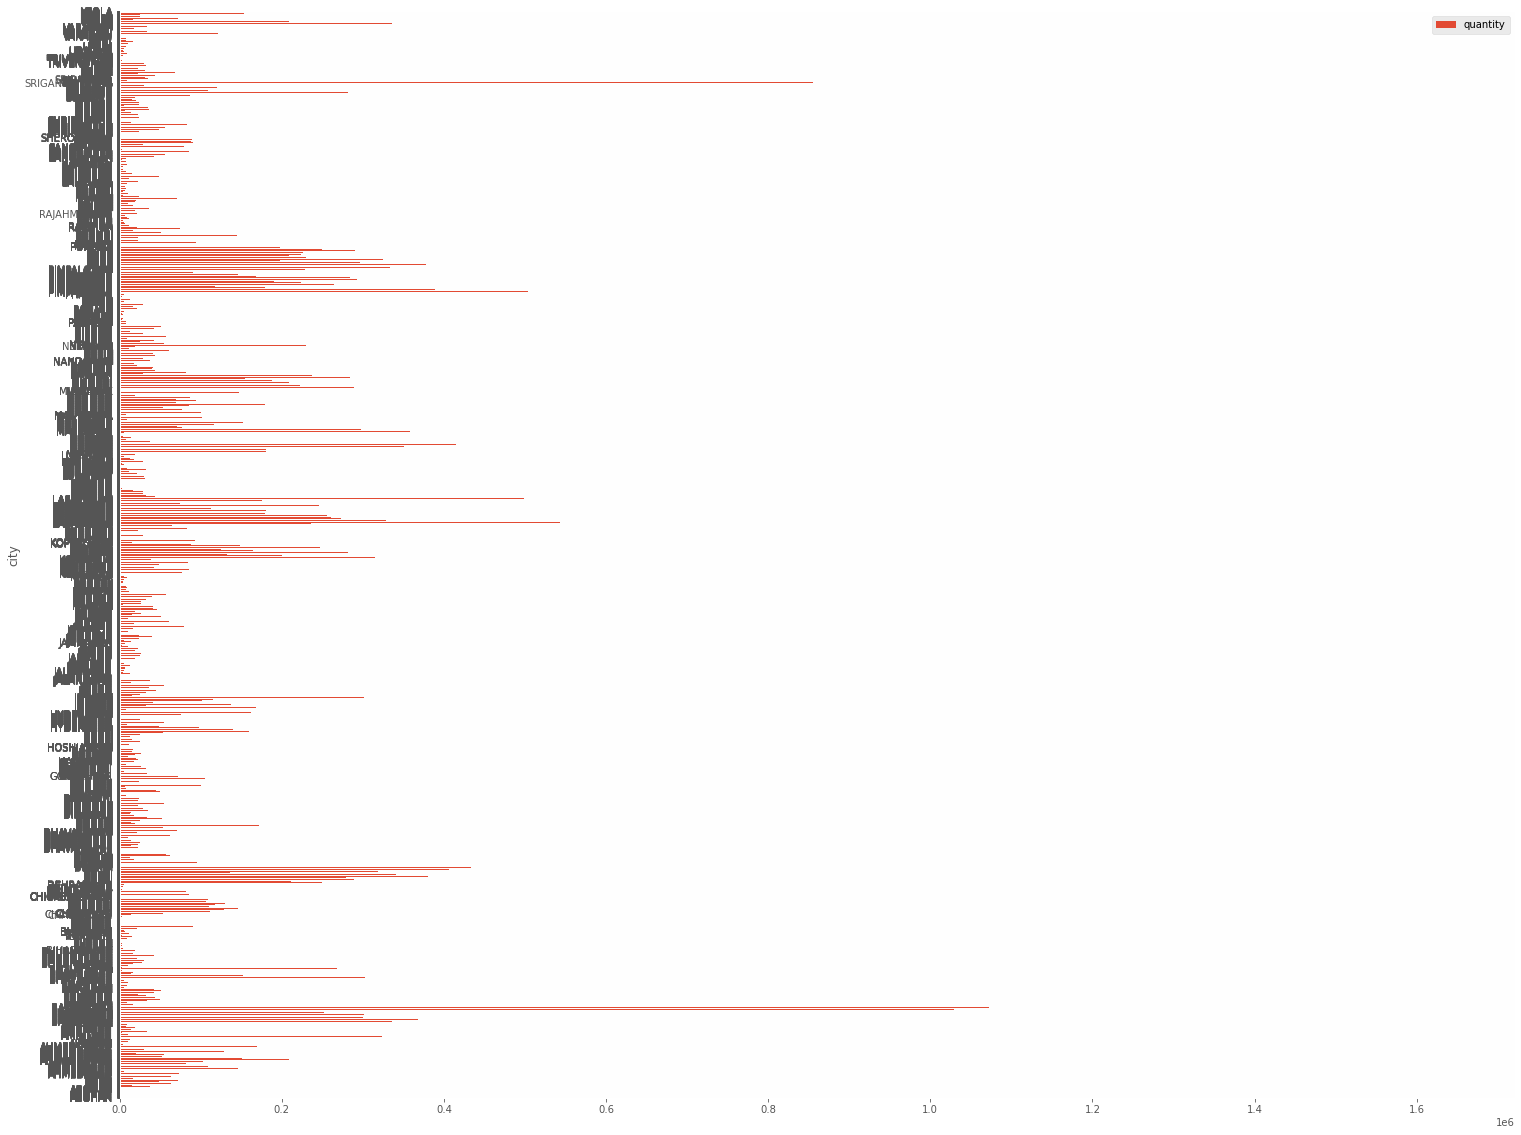

In [83]:
# Plot the Data
data.plot(kind ="barh", x = "city", y = 'quantity')
plt.show()


In [86]:
data_MS = data[data.city == "MUMBAI"]
data_MS.head()


market    month  year  quantity  priceMin  priceMax  priceMod state  \
6654  MUMBAI  January  2004    267100       719       971       849    MS   
6655  MUMBAI  January  2005    275845       261       513       387    MS   
6656  MUMBAI  January  2006    228000       315       488       402    MS   
6657  MUMBAI  January  2007    205200       866      1136       997    MS   
6658  MUMBAI  January  2008    267550       348       550       448    MS   

        city       date  
6654  MUMBAI 2004-01-01  
6655  MUMBAI 2005-01-01  
6656  MUMBAI 2006-01-01  
6657  MUMBAI 2007-01-01  
6658  MUMBAI 2008-01-01

In [87]:
# for easy undersatnding the numbers in describe function, we set precision to 0
pd.set_option("precision", 0)
data_MS.describe()

year  quantity  priceMin  priceMax  priceMod
count   146       146       146       146       146
mean   2010    221721       901      1317      1114
std       4     40793       731      1019       883
min    2004    131590       215       335       287
25%    2007    195125       434       648       544
50%    2010    222220       692       982       846
75%    2013    246050      1099      1623      1392
max    2016    413681      4005      5517      4714

<h3>Setting index by Date</h3>

In [88]:
data_MS.index

Int64Index([6654, 6655, 6656, 6657, 6658, 6659, 6660, 6661, 6662, 6663,
            ...
            6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799],
           dtype='int64', length=146)

In [89]:
# set the index as date
data_MS = data_MS.sort_values(by="date")
data_MS.head()

market     month  year  quantity  priceMin  priceMax  priceMod state  \
6654  MUMBAI   January  2004    267100       719       971       849    MS   
6667  MUMBAI  February  2004    239350       614       834       736    MS   
6680  MUMBAI     March  2004    238000       436       557       498    MS   
6692  MUMBAI     April  2004    198200       346       475       397    MS   
6704  MUMBAI       May  2004    166430       357       466       405    MS   

        city       date  
6654  MUMBAI 2004-01-01  
6667  MUMBAI 2004-02-01  
6680  MUMBAI 2004-03-01  
6692  MUMBAI 2004-04-01  
6704  MUMBAI 2004-05-01

In [90]:
# Set the Index for the Dataframe
data_MS.index = pd.PeriodIndex(data_MS.date, freq='M')
data_MS.head()

market     month  year  quantity  priceMin  priceMax  priceMod state  \
date                                                                            
2004-01  MUMBAI   January  2004    267100       719       971       849    MS   
2004-02  MUMBAI  February  2004    239350       614       834       736    MS   
2004-03  MUMBAI     March  2004    238000       436       557       498    MS   
2004-04  MUMBAI     April  2004    198200       346       475       397    MS   
2004-05  MUMBAI       May  2004    166430       357       466       405    MS   

           city       date  
date                        
2004-01  MUMBAI 2004-01-01  
2004-02  MUMBAI 2004-02-01  
2004-03  MUMBAI 2004-03-01  
2004-04  MUMBAI 2004-04-01  
2004-05  MUMBAI 2004-05-01

<h3>Visualization of prices over time</h3>

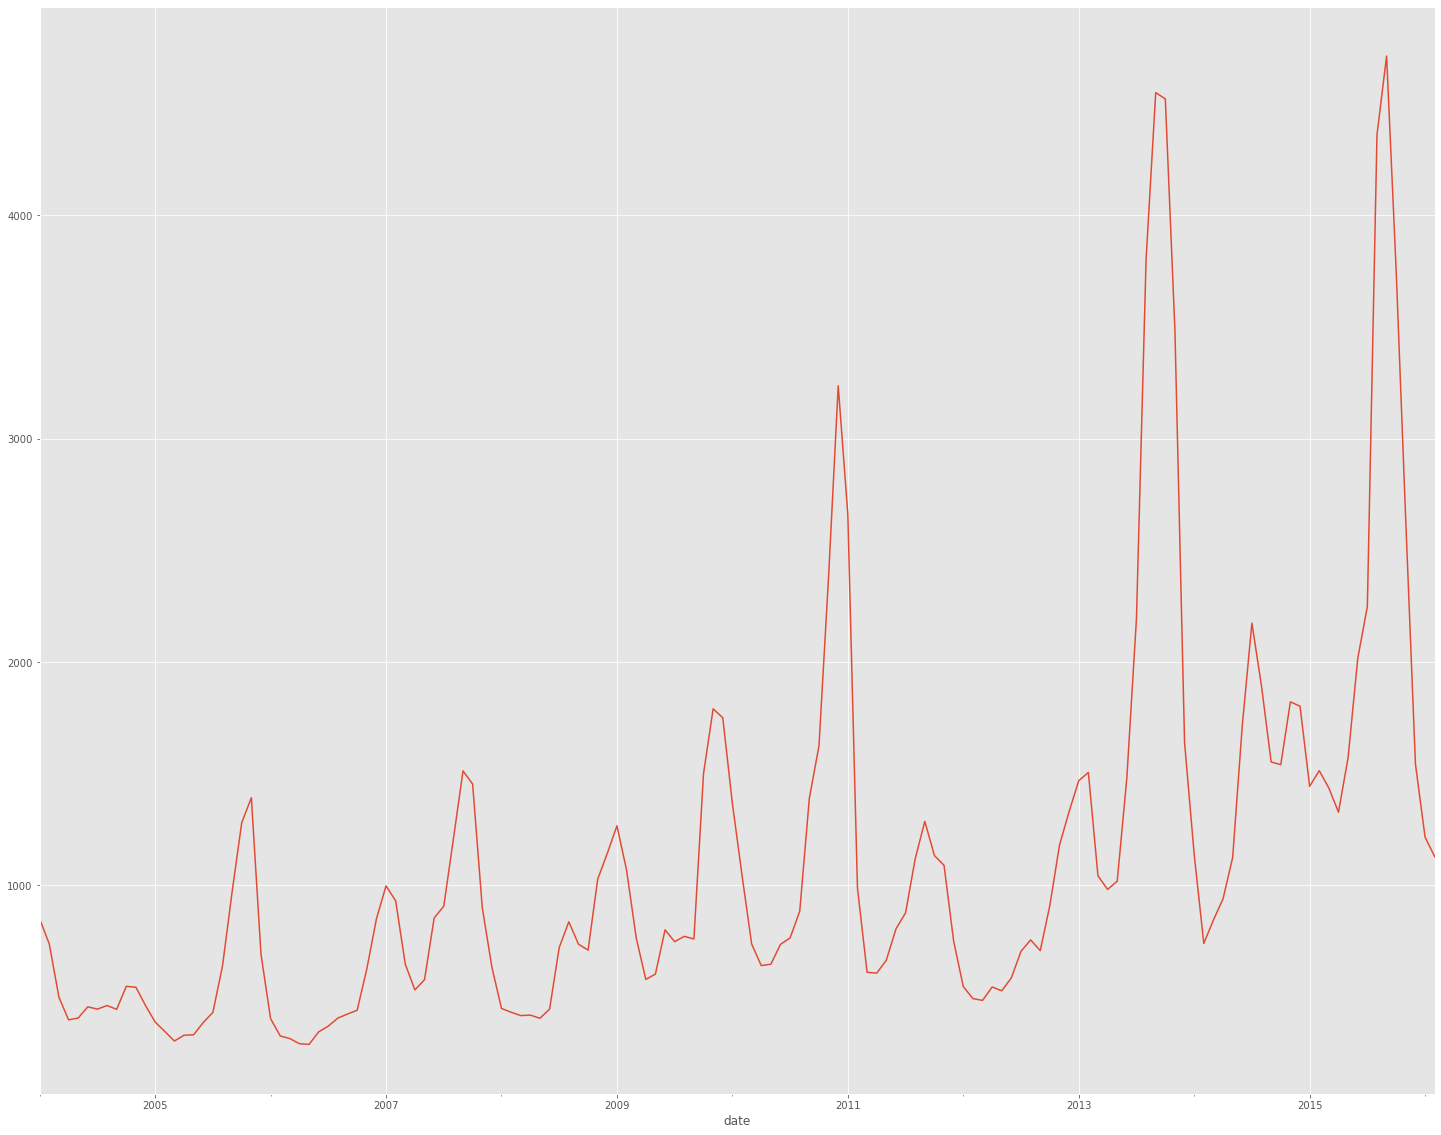

In [91]:
data_MS.priceMod.plot()
plt.show()

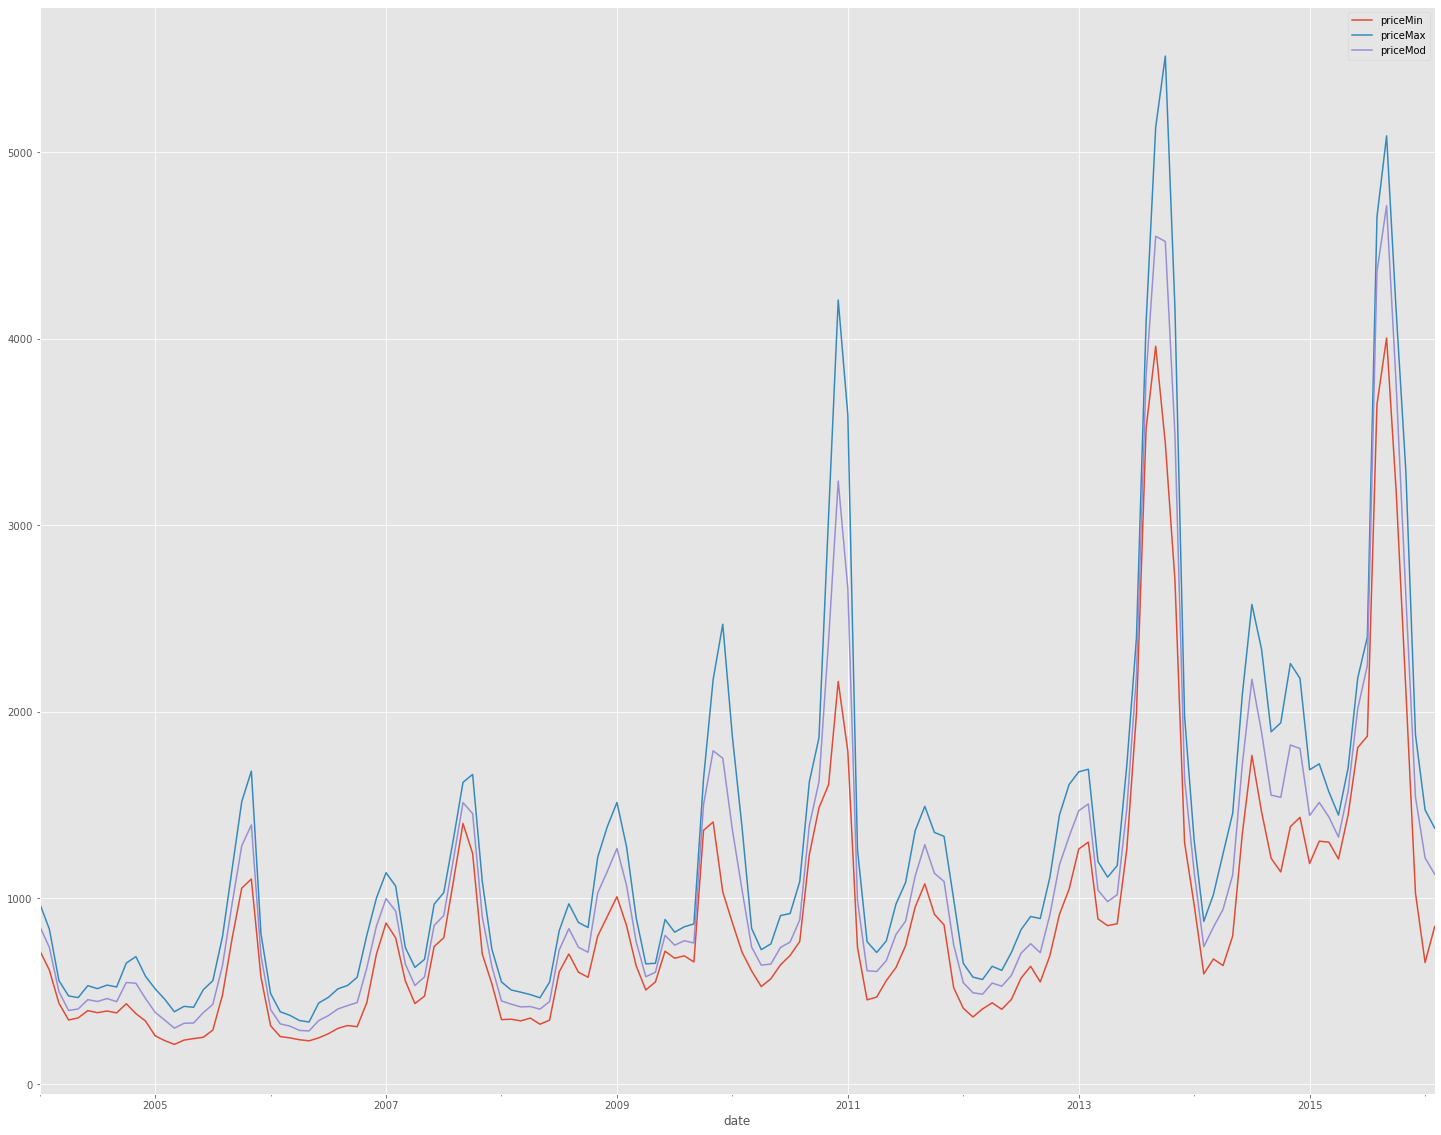

In [92]:
data_MS.plot(kind="line", y=["priceMin" ,"priceMax" ,"priceMod"])
plt.show()

<h3>To calculate the range of change</h3>

In [93]:
data_MS["priceDiff"] = data_MS["priceMax"] - data_MS["priceMin"]
data_MS.head()

market     month  year  quantity  priceMin  priceMax  priceMod state  \
date                                                                            
2004-01  MUMBAI   January  2004    267100       719       971       849    MS   
2004-02  MUMBAI  February  2004    239350       614       834       736    MS   
2004-03  MUMBAI     March  2004    238000       436       557       498    MS   
2004-04  MUMBAI     April  2004    198200       346       475       397    MS   
2004-05  MUMBAI       May  2004    166430       357       466       405    MS   

           city       date  priceDiff  
date                                   
2004-01  MUMBAI 2004-01-01        252  
2004-02  MUMBAI 2004-02-01        220  
2004-03  MUMBAI 2004-03-01        121  
2004-04  MUMBAI 2004-04-01        129  
2004-05  MUMBAI 2004-05-01        109

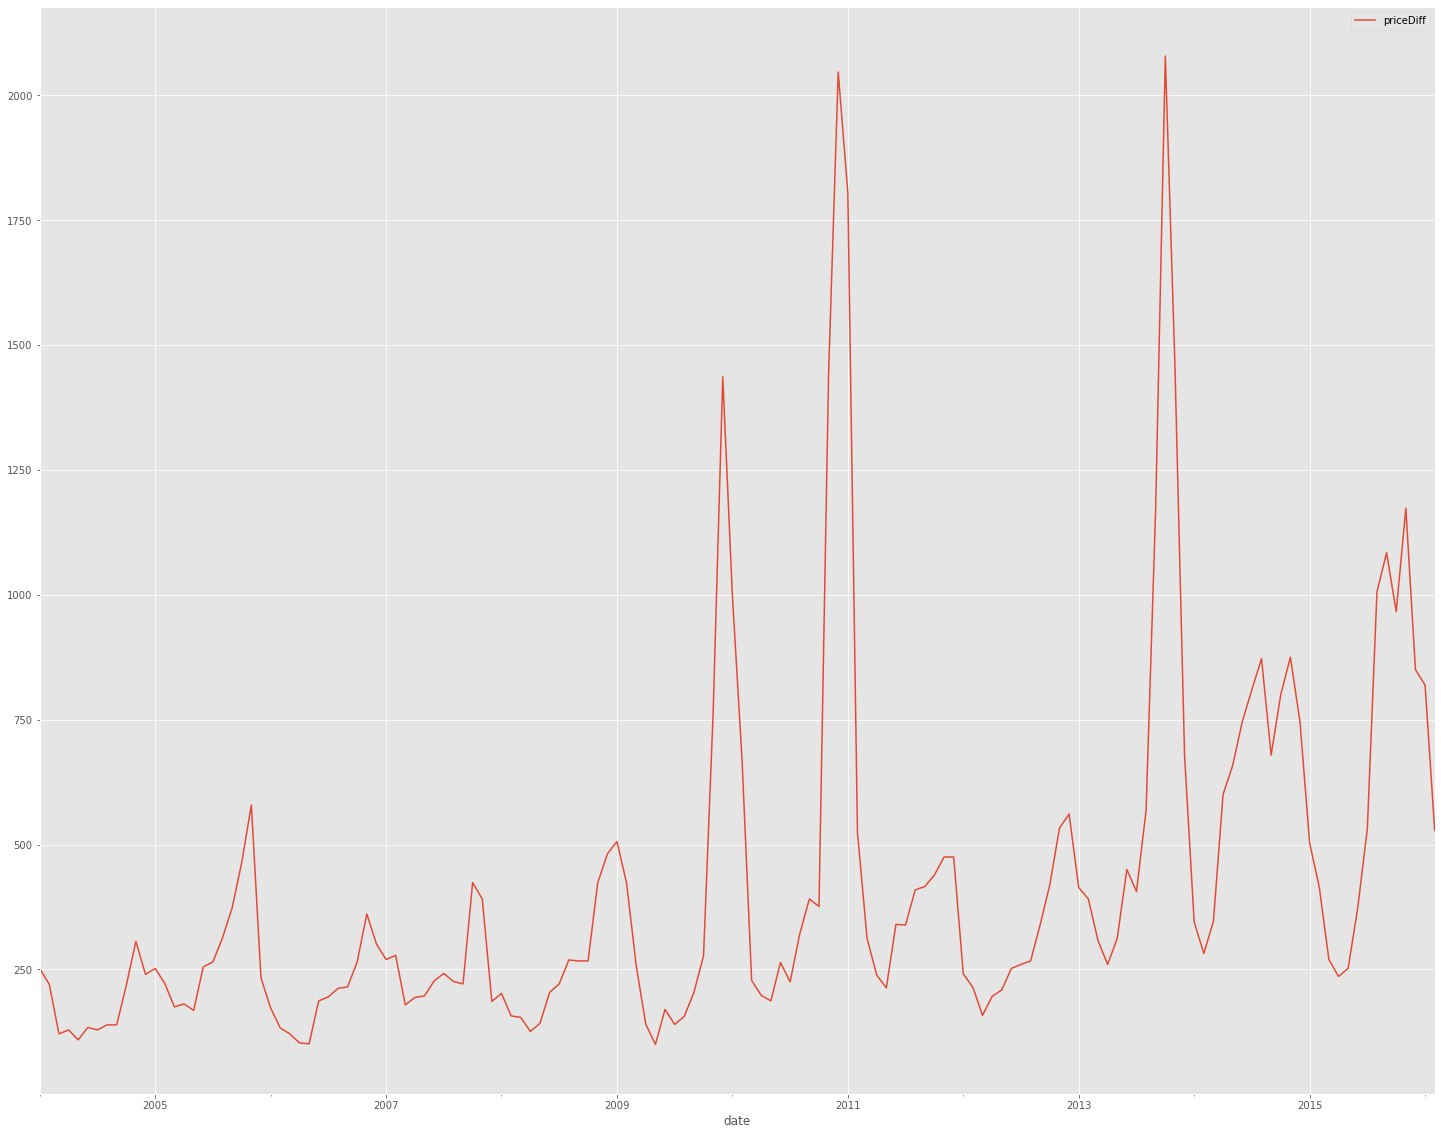

In [94]:
data_MS.plot(y="priceDiff")
plt.show()

In [95]:
# a new column for the intger month
data_MS["monthVal"] = pd.DatetimeIndex(data_MS["date"]).month
data_MS.head()

market     month  year  quantity  priceMin  priceMax  priceMod state  \
date                                                                            
2004-01  MUMBAI   January  2004    267100       719       971       849    MS   
2004-02  MUMBAI  February  2004    239350       614       834       736    MS   
2004-03  MUMBAI     March  2004    238000       436       557       498    MS   
2004-04  MUMBAI     April  2004    198200       346       475       397    MS   
2004-05  MUMBAI       May  2004    166430       357       466       405    MS   

           city       date  priceDiff  monthVal  
date                                             
2004-01  MUMBAI 2004-01-01        252         1  
2004-02  MUMBAI 2004-02-01        220         2  
2004-03  MUMBAI 2004-03-01        121         3  
2004-04  MUMBAI 2004-04-01        129         4  
2004-05  MUMBAI 2004-05-01        109         5

In [96]:
data_MSPivot = pd.pivot_table(data_MS, values = "priceDiff", 
                             columns = "year", index = "monthVal")
data_MSPivot

year      2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
monthVal                                                                     
1          252   252   173   270   202   506   998  1804   241   414   345   
2          220   222   133   278   157   423   671   524   214   391   282   
3          121   175   121   179   154   258   228   312   158   308   346   
4          129   181   103   194   126   140   198   239   196   260   600   
5          109   168   101   197   142   100   187   213   209   312   658   
6          134   255   187   227   204   170   264   340   252   450   746   
7          129   265   195   242   221   140   225   339   260   406   810   
8          139   313   212   226   269   156   321   409   267   568   872   
9          139   373   215   221   267   204   391   416   340  1175   679   
10         218   464   265   424   267   277   376   439   420  2078   800   
11         306   579   361   391   423   764  1442   475   533  1458   875   
12         240   233   301   186   481  1436  2046   475   561   678   745   

year      2015  2016  
monthVal              
1          503   819  
2          415   528  
3          270   NaN  
4          236   NaN  
5          252   NaN  
6          373   NaN  
7          532   NaN  
8         1006   NaN  
9         1084   NaN  
10         966   NaN  
11        1173   NaN  
12         850   NaN

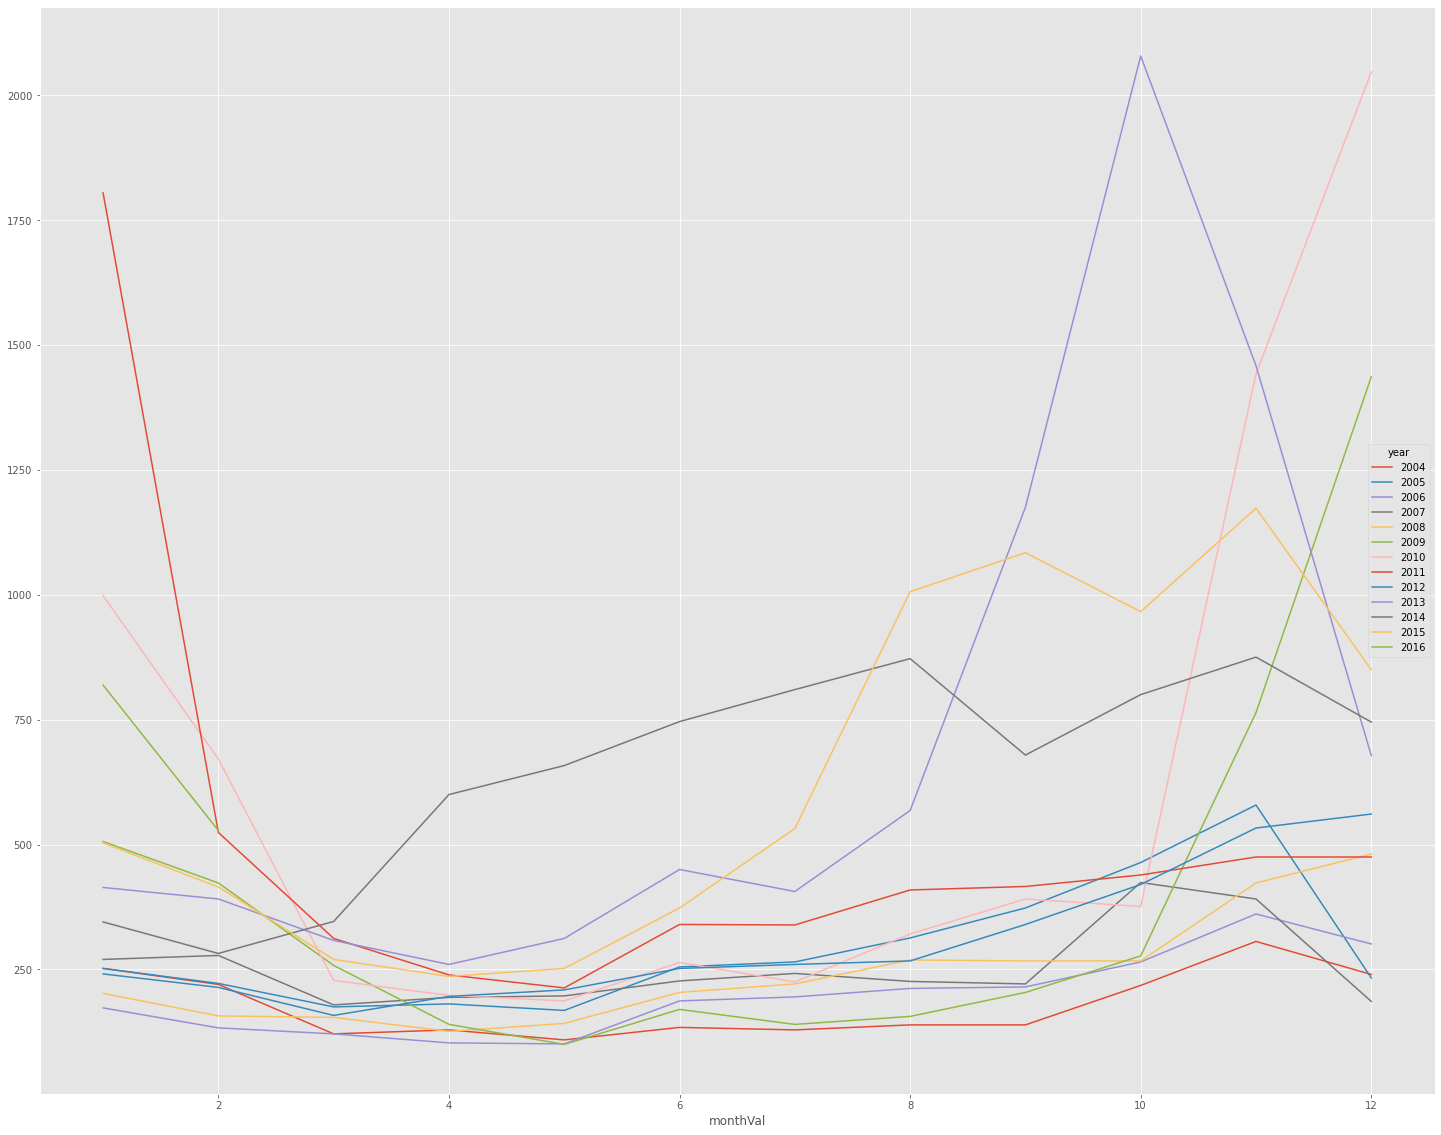

In [97]:
data_MSPivot.plot()
plt.show()

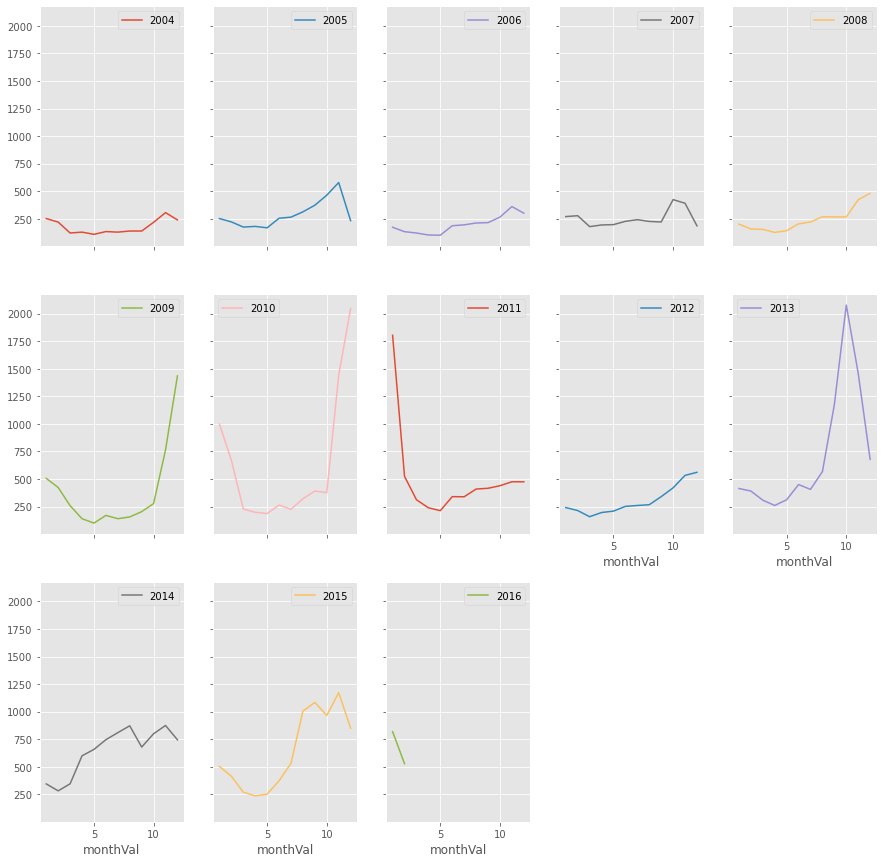

In [98]:
data_MSPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)
plt.show()

In [99]:
# change the date column to time interval column
data.date = pd.DatetimeIndex(data.date)

In [107]:
# change the index to date column
data.index = pd.PeriodIndex(data.date, freq="M")
data.head()

market    month  year  quantity  priceMin  priceMax  priceMod  \
date                                                                         
2005-01  ABOHAR(PB)  January  2005      2350       404       493       446   
2006-01  ABOHAR(PB)  January  2006       900       487       638       563   
2010-01  ABOHAR(PB)  January  2010       790      1283      1592      1460   
2011-01  ABOHAR(PB)  January  2011       245      3067      3750      3433   
2012-01  ABOHAR(PB)  January  2012      1035       523       686       605   

        state    city       date  
date                              
2005-01    PB  ABOHAR 2005-01-01  
2006-01    PB  ABOHAR 2006-01-01  
2010-01    PB  ABOHAR 2010-01-01  
2011-01    PB  ABOHAR 2011-01-01  
2012-01    PB  ABOHAR 2012-01-01

In [110]:
data_mumbai = data.loc[data.city == "MUMBAI"].copy()
data_mumbai.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
date                                                                           
2004-01  MUMBAI  January  2004    267100       719       971       849    MS   
2005-01  MUMBAI  January  2005    275845       261       513       387    MS   
2006-01  MUMBAI  January  2006    228000       315       488       402    MS   
2007-01  MUMBAI  January  2007    205200       866      1136       997    MS   
2008-01  MUMBAI  January  2008    267550       348       550       448    MS   

           city       date  
date                        
2004-01  MUMBAI 2004-01-01  
2005-01  MUMBAI 2005-01-01  
2006-01  MUMBAI 2006-01-01  
2007-01  MUMBAI 2007-01-01  
2008-01  MUMBAI 2008-01-01

In [111]:
data_mumbai = data_mumbai.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
data_mumbai.head()

quantity  priceMod       date
date                                  
2004-01    267100       849 2004-01-01
2005-01    275845       387 2005-01-01
2006-01    228000       402 2006-01-01
2007-01    205200       997 2007-01-01
2008-01    267550       448 2008-01-01

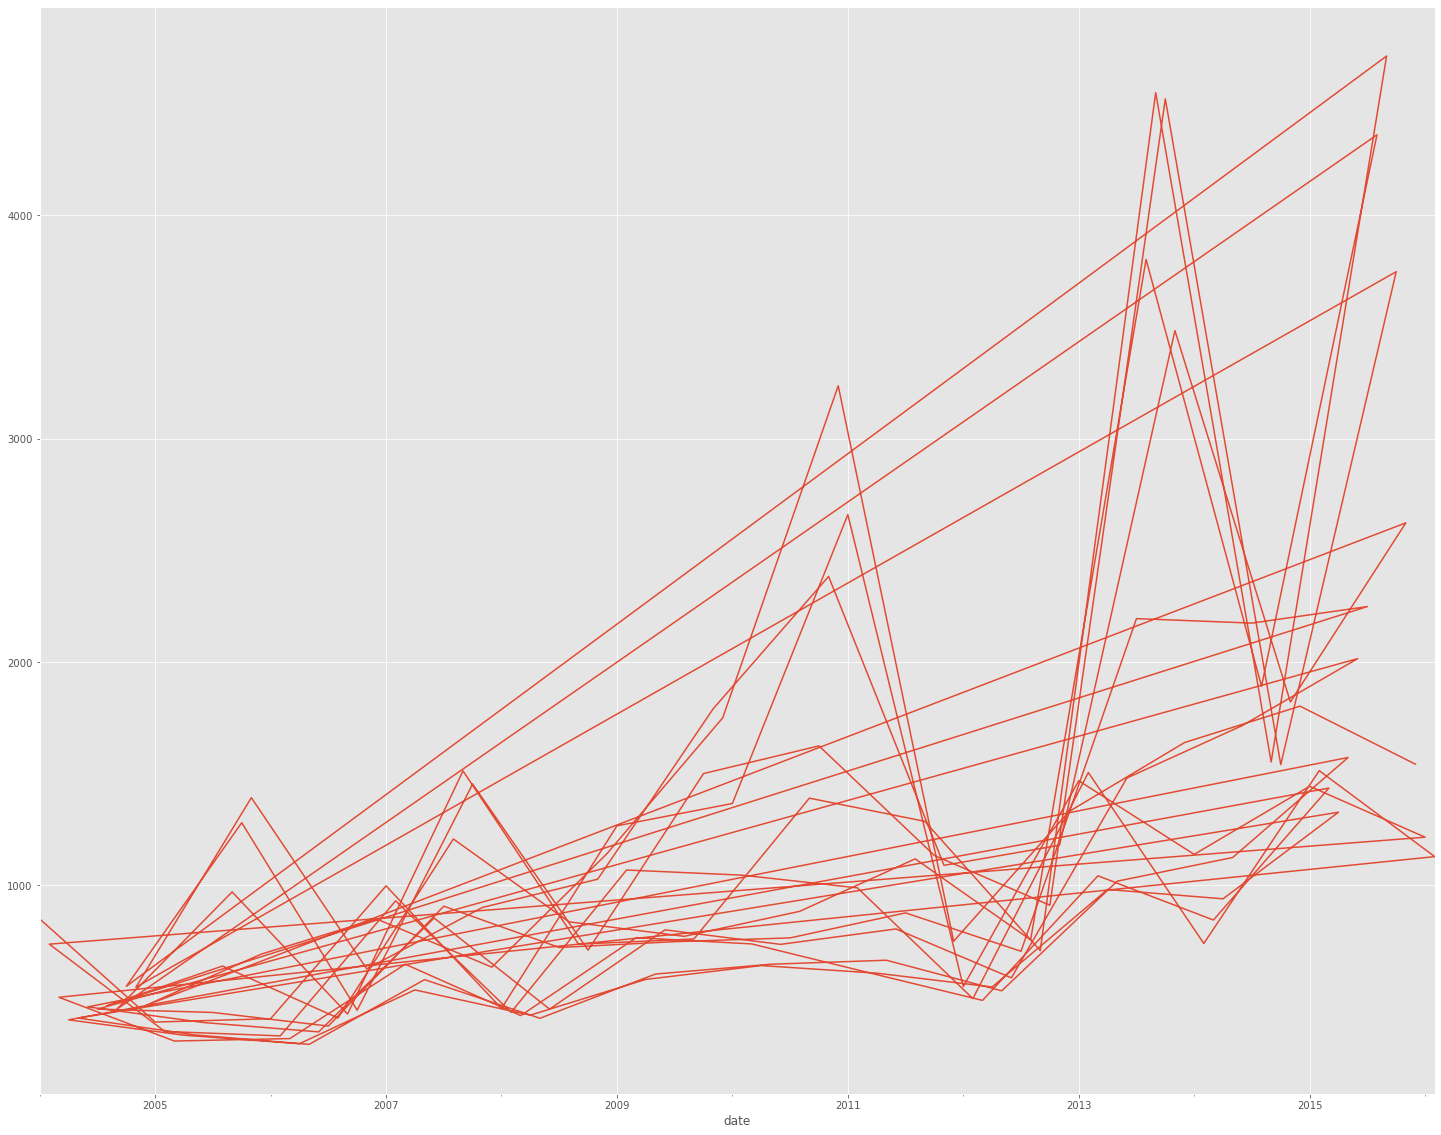

In [112]:
data_mumbai.priceMod.plot()
plt.show()

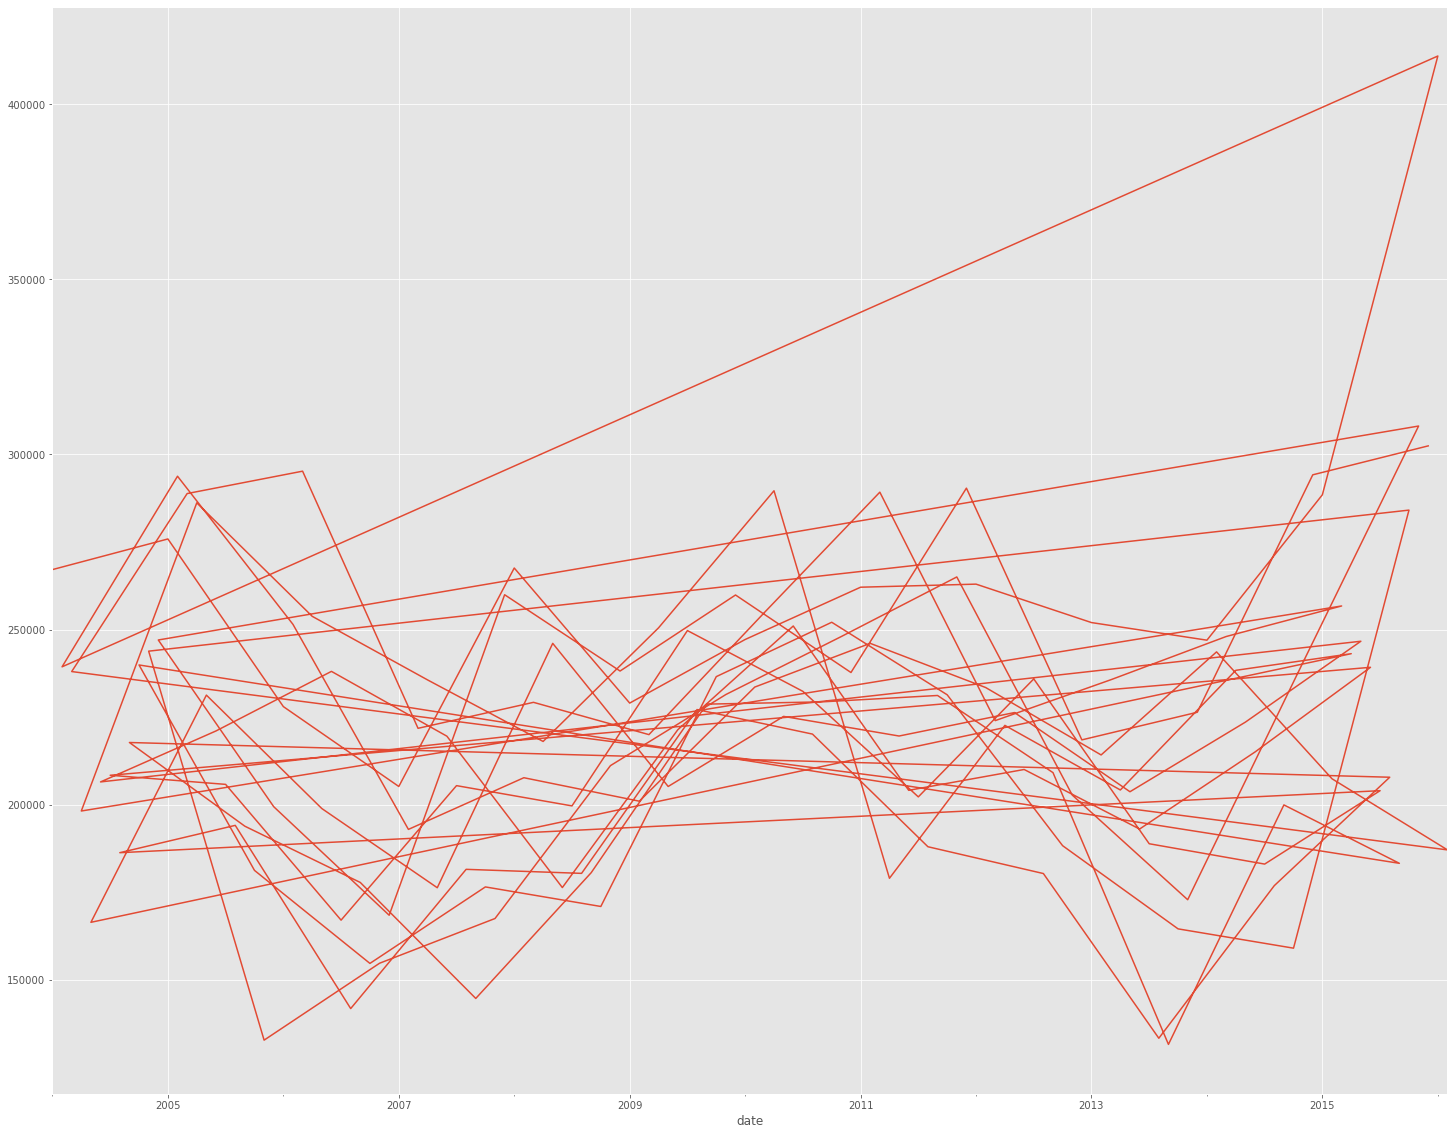

In [113]:
data_mumbai.quantity.plot()
plt.show()

<AxesSubplot:ylabel='Frequency'>

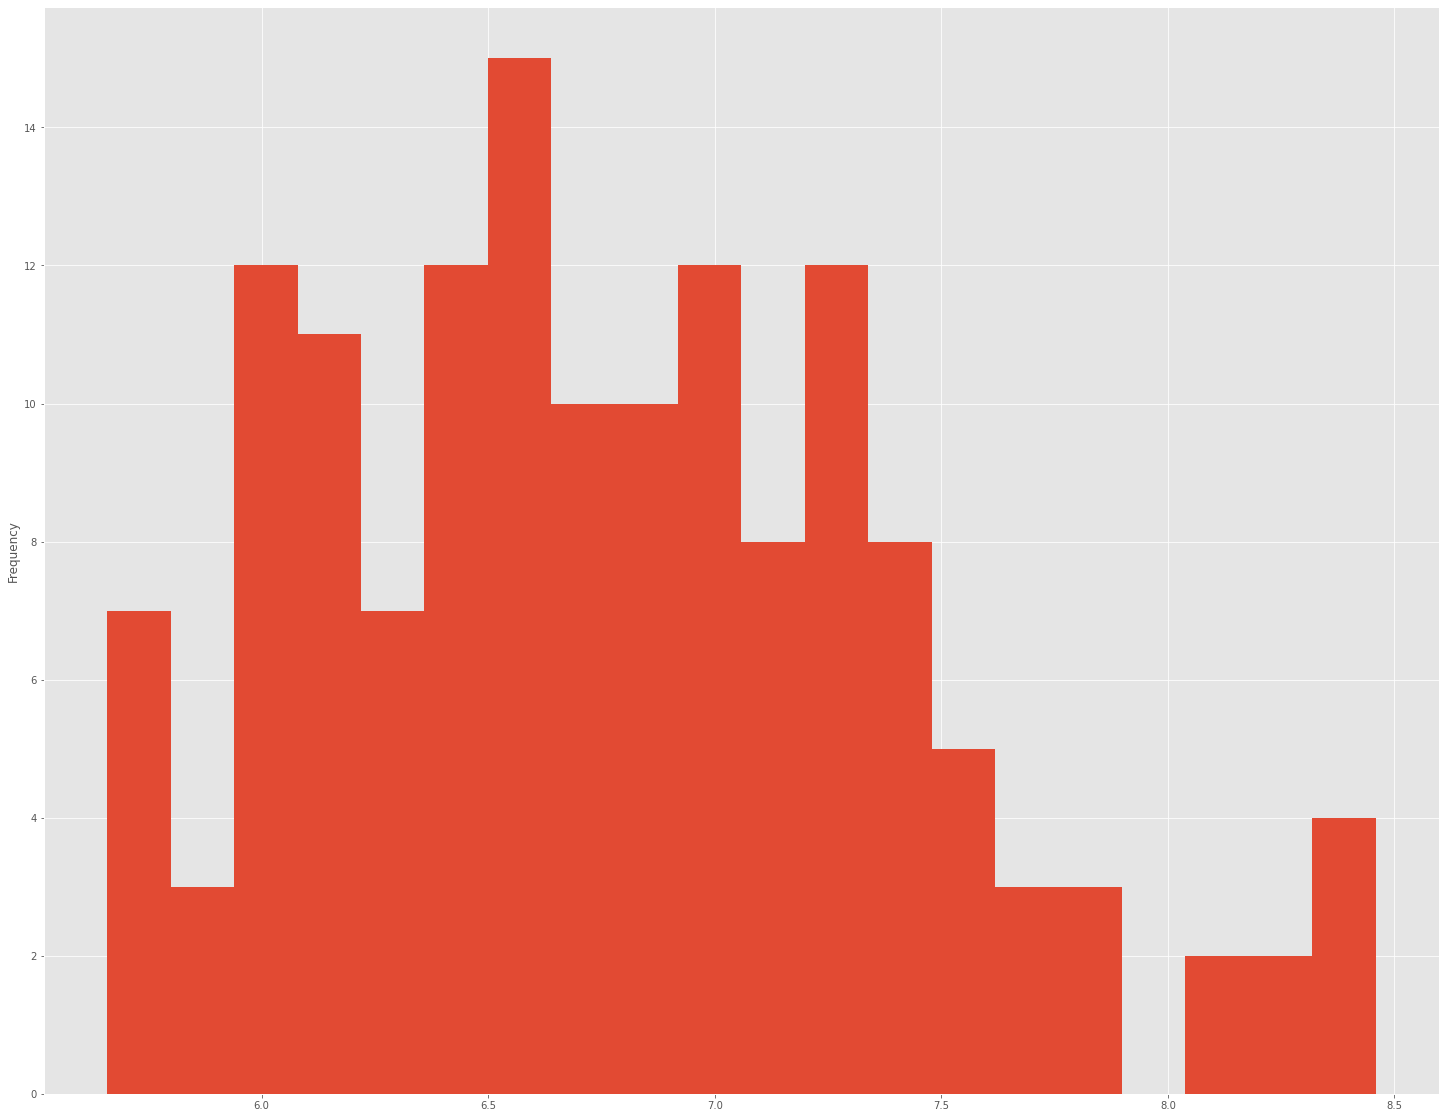

In [115]:
data_mumbai["log_priceMod"] = np.log(data_mumbai.priceMod)
data_mumbai.log_priceMod.plot(kind="hist", bins=20)

<AxesSubplot:xlabel='date'>

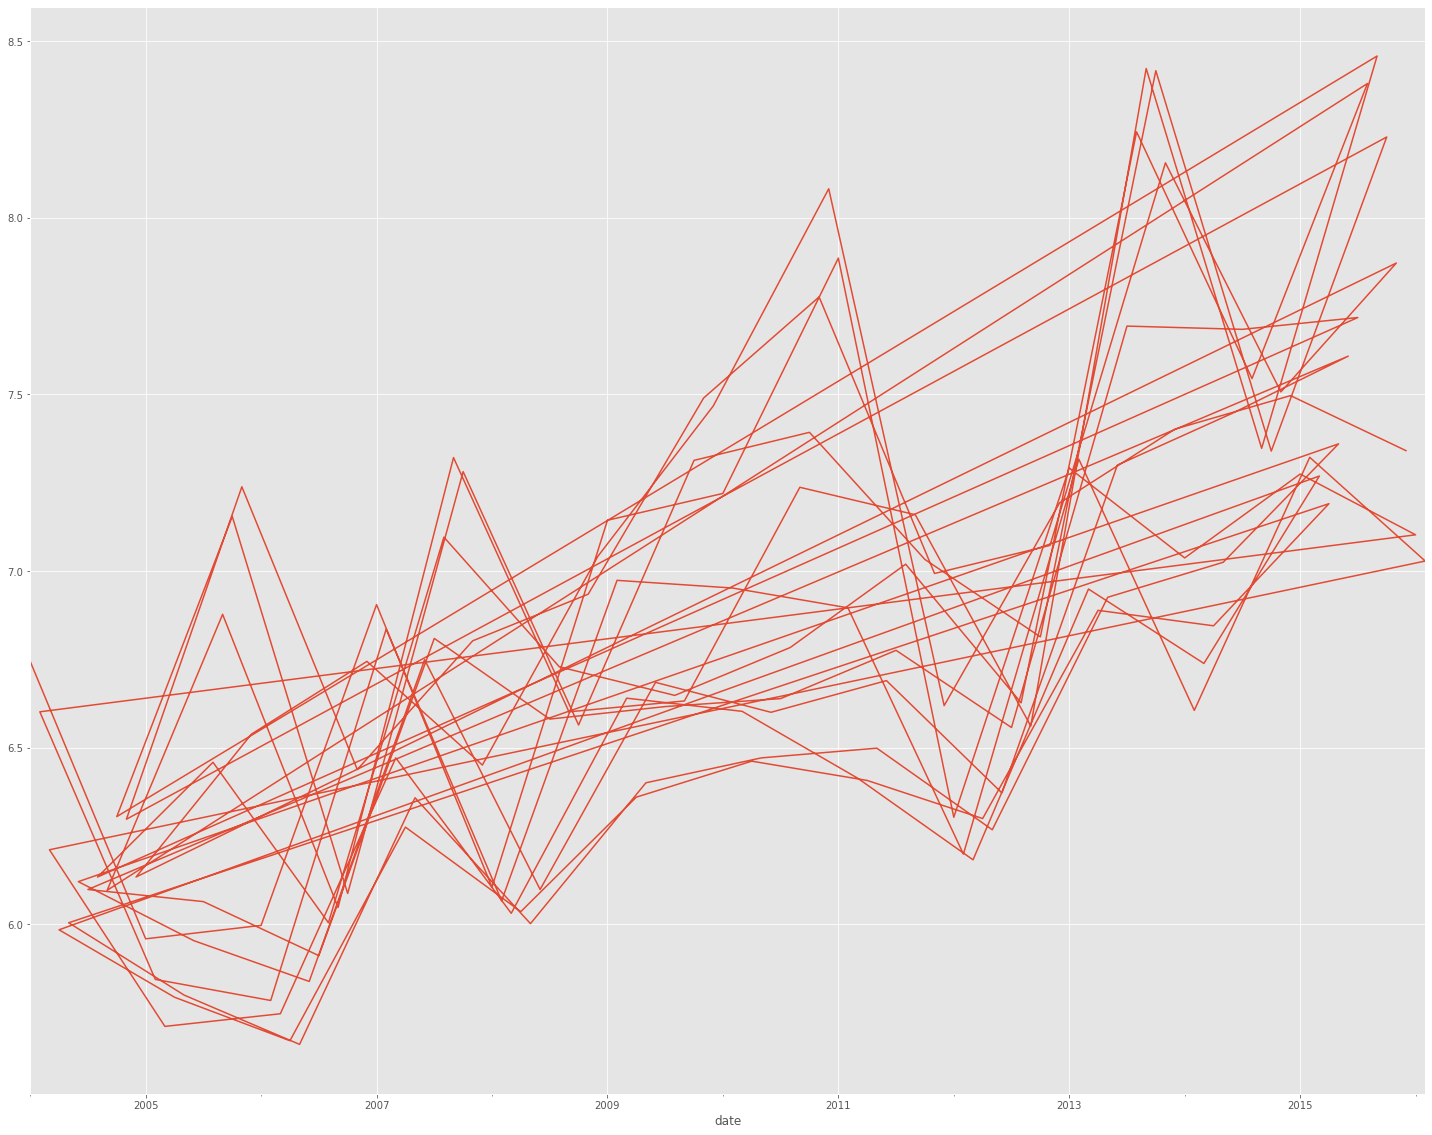

In [116]:
data_mumbai.log_priceMod.plot()

<h3> Time Series Model </h3>

In [117]:
data_mumbai_mean = data_mumbai.log_priceMod.mean()
data_mumbai["mean_price"] = np.exp(data_mumbai_mean)
data_mumbai.head()

quantity  priceMod       date  log_priceMod  mean_price
date                                                            
2004-01    267100       849 2004-01-01             7         889
2005-01    275845       387 2005-01-01             6         889
2006-01    228000       402 2006-01-01             6         889
2007-01    205200       997 2007-01-01             7         889
2008-01    267550       448 2008-01-01             6         889

<AxesSubplot:xlabel='date'>

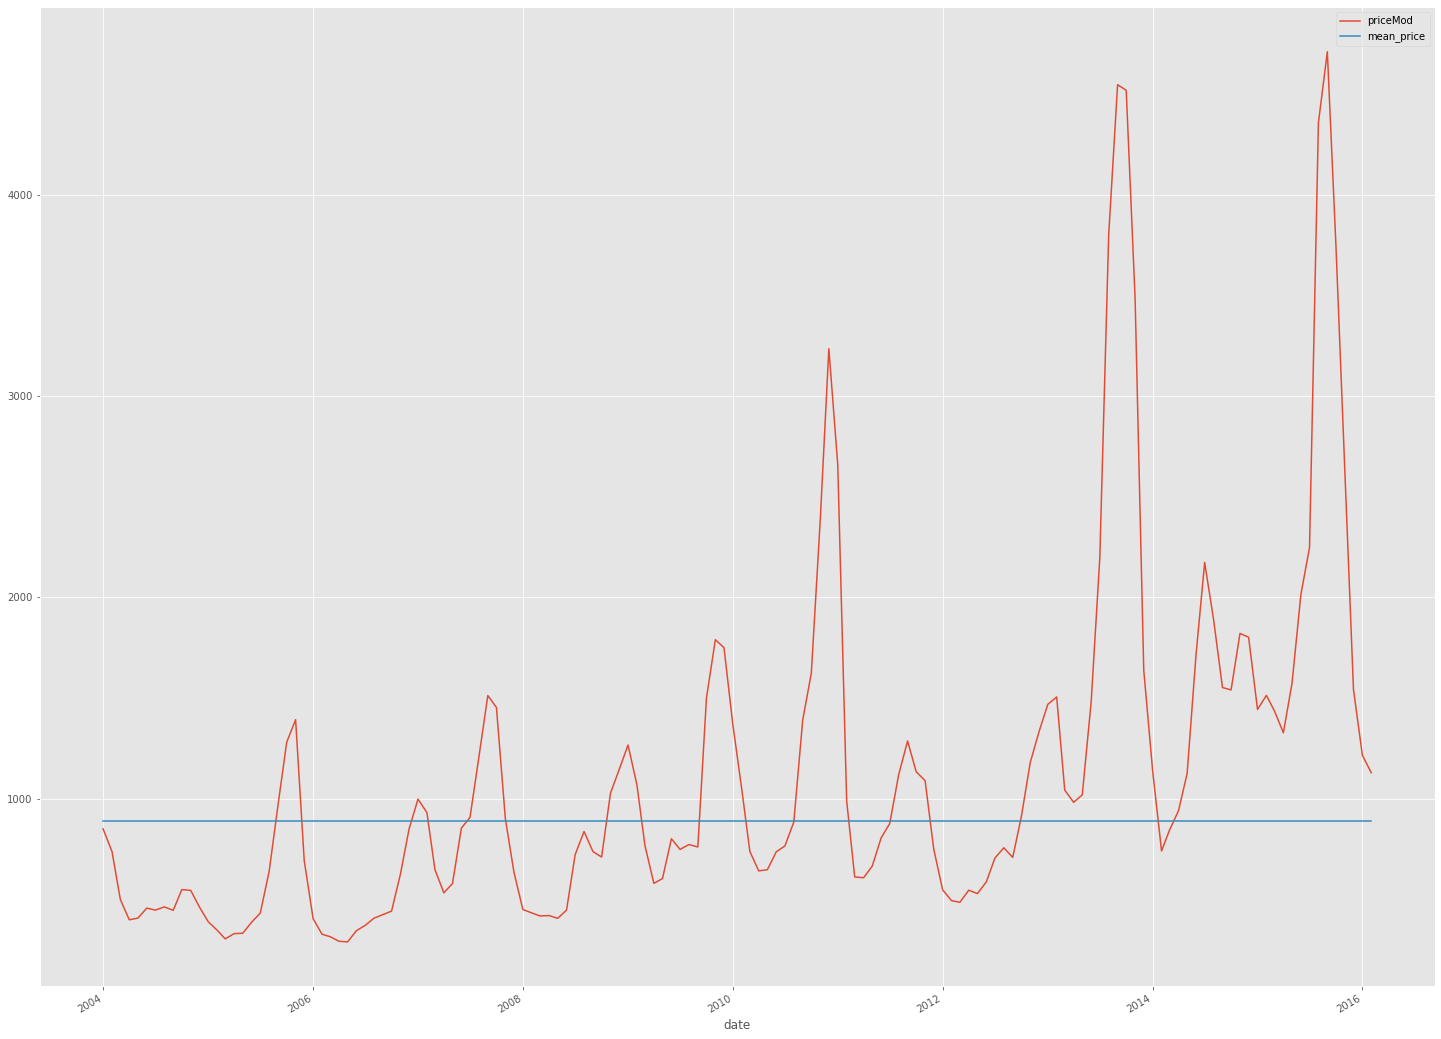

In [118]:
data_mumbai.plot(kind="line", x="date", y=["priceMod", "mean_price"])

<h3> evaluating model using RMSE </h3>

In [119]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [121]:
mean_modelRMSE = RMSE(data_mumbai.priceMod, data_mumbai.mean_price)
mean_modelRMSE

908.4772843986449

In [122]:
Result_data = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_data.loc[0,"Model"] = "Mean Model"
Result_data.loc[0,"Forcast"] = np.exp(data_mumbai_mean)
Result_data.loc[0,"RMSE"] = mean_modelRMSE
Result_data

Model Forcast RMSE
0  Mean Model     889  908

<h3> linear trend model </h3>

In [123]:
data_mumbai.head()

quantity  priceMod       date  log_priceMod  mean_price
date                                                            
2004-01    267100       849 2004-01-01             7         889
2005-01    275845       387 2005-01-01             6         889
2006-01    228000       402 2006-01-01             6         889
2007-01    205200       997 2007-01-01             7         889
2008-01    267550       448 2008-01-01             6         889

In [124]:
data_mumbai.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 146 entries, 2004-01 to 2015-12
Freq: M
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   quantity      146 non-null    int32         
 1   priceMod      146 non-null    int32         
 2   date          146 non-null    datetime64[ns]
 3   log_priceMod  146 non-null    float64       
 4   mean_price    146 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(2)
memory usage: 5.7 KB


In [125]:
# Converting the date into datetinme delta starting from 0
data_mumbai["timeindex"] = data_mumbai.date - data_mumbai.date.min()
data_mumbai.head()


quantity  priceMod       date  log_priceMod  mean_price timeindex
date                                                                      
2004-01    267100       849 2004-01-01             7         889    0 days
2005-01    275845       387 2005-01-01             6         889  366 days
2006-01    228000       402 2006-01-01             6         889  731 days
2007-01    205200       997 2007-01-01             7         889 1096 days
2008-01    267550       448 2008-01-01             6         889 1461 days

In [126]:
data_mumbai.dtypes

quantity                  int32
priceMod                  int32
date             datetime64[ns]
log_priceMod            float64
mean_price              float64
timeindex       timedelta64[ns]
dtype: object

In [127]:
# converting the timeindex into months using timedelta
data_mumbai["timeindex"] = data_mumbai["timeindex"]/np.timedelta64(1,"M")
data_mumbai.head()

quantity  priceMod       date  log_priceMod  mean_price  timeindex
date                                                                       
2004-01    267100       849 2004-01-01             7         889          0
2005-01    275845       387 2005-01-01             6         889         12
2006-01    228000       402 2006-01-01             6         889         24
2007-01    205200       997 2007-01-01             7         889         36
2008-01    267550       448 2008-01-01             6         889         48

In [128]:
data_mumbai["timeindex"] = data_mumbai["timeindex"].round(0).astype(int)
data_mumbai.tail()


quantity  priceMod       date  log_priceMod  mean_price  timeindex
date                                                                       
2011-12    290350       749 2011-12-01             7         889         95
2012-12    218500      1330 2012-12-01             7         889        107
2013-12    226385      1639 2013-12-01             7         889        119
2014-12    294150      1802 2014-12-01             7         889        131
2015-12    302409      1542 2015-12-01             7         889        143

<h3> Linear model </h3>

In [130]:
import statsmodels.formula.api as smf
linear_model = smf.ols('log_priceMod ~ timeindex', data = data_mumbai).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sun, 22 May 2022   Prob (F-statistic):           8.89e-22
Time:                        13:12:59   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeindex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.02841087, 6.15450176, 6.28059265, 6.40668353, 6.53277442,
       6.65886531, 6.7849562 , 6.91104708, 7.03713797, 7.16322886,
       7.28931975, 7.41541064, 7.54150152, 6.03891844, 6.16500933,
       6.29110022, 6.41719111, 6.543282  , 6.66937288, 6.79546377,
       6.92155466, 7.04764555, 7.17373643, 7.29982732, 7.42591821,
       7.5520091 , 6.04942602, 6.17551691, 6.30160779, 6.42769868,
       6.55378957, 6.67988046, 6.80597134, 6.93206223, 7.05815312,
       7.18424401, 7.3103349 , 7.43642578, 6.05993359, 6.18602448,
       6.31211537, 6.43820626, 6.56429714, 6.69038803, 6.81647892,
       6.94256981, 7.06866069, 7.19475158, 7.32084247, 7.44693336,
       6.07044117, 6.19653205, 6.32262294, 6.44871383, 6.57480472,
       6.70089561, 6.82698649, 6.95307738, 7.07916827, 7.20525916,
       7.33135004, 7.45744093, 6.08094874, 6.20703963, 6.33313052,
       6.4592214 , 6.58531229, 6.71140318, 6.83749407, 6.96358495,
       7.08967584, 7.21576673, 7.34185762, 7.46794851, 6.09145

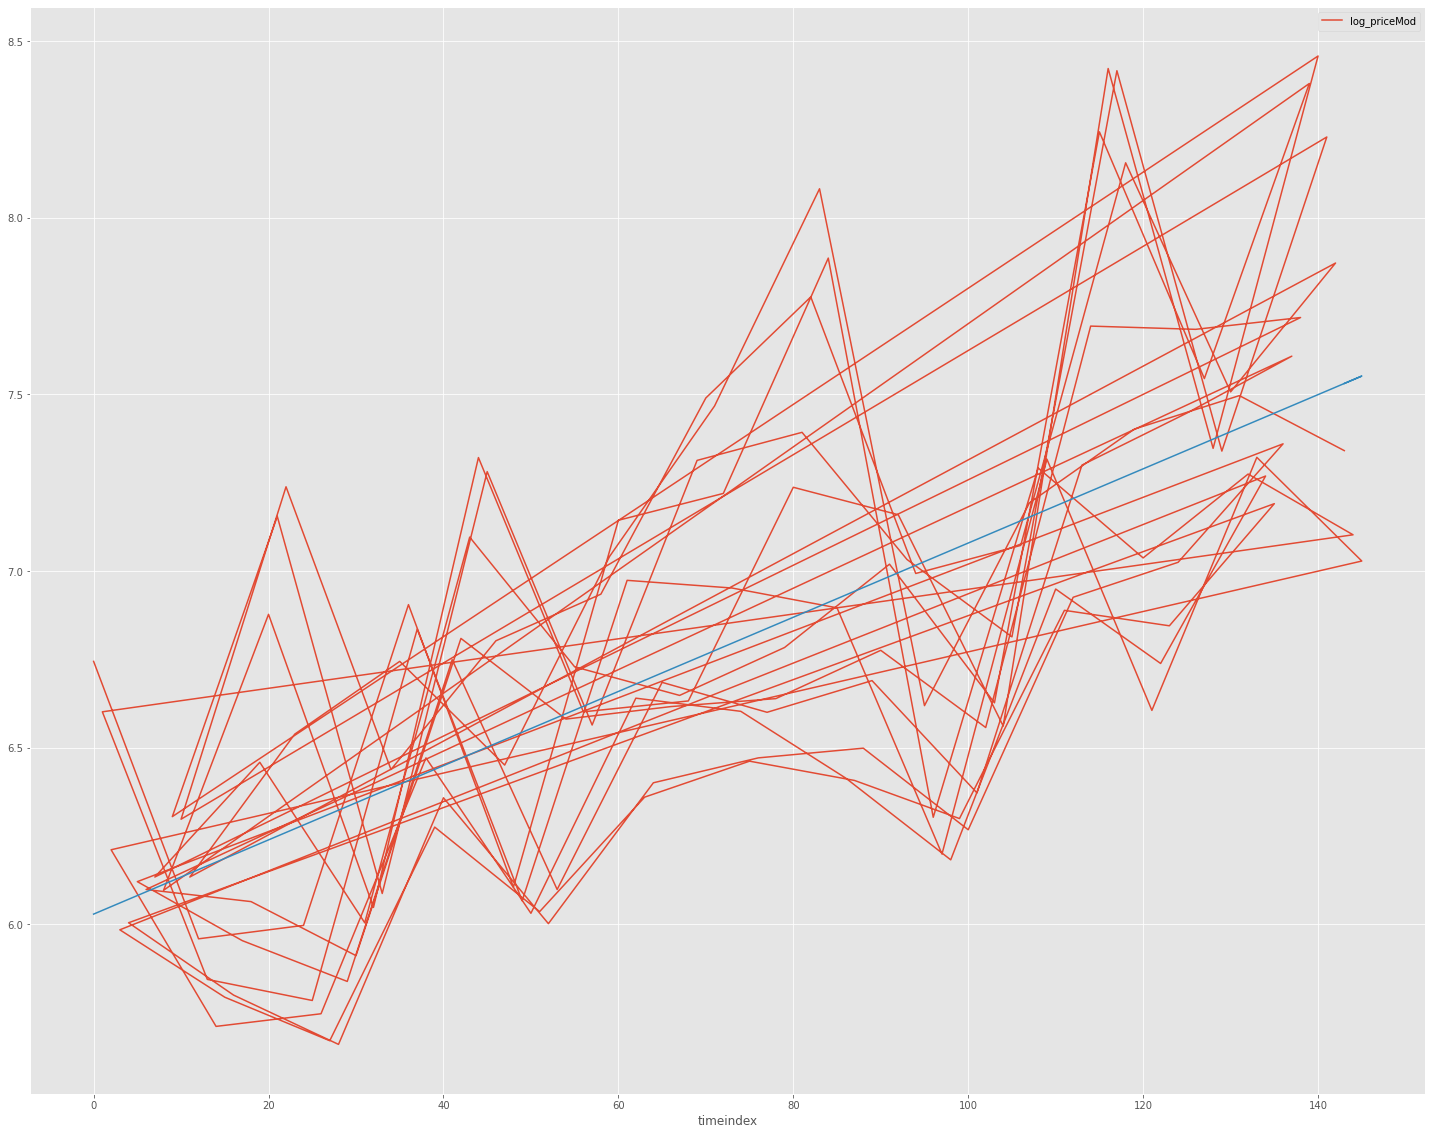

In [132]:
data_mumbai.plot(kind = "line", x="timeindex", y="log_priceMod")
plt.plot(data_mumbai.timeindex, linear_model_pred)

In [133]:
# Manual Calculation
model_linear_forecast_manual = 0.0093 * 146 + 6.1121
model_linear_forecast_manual

7.4699

In [134]:
data_mumbai["linear_price"] = np.exp(linear_model_pred)
data_mumbai.head()

quantity  priceMod       date  log_priceMod  mean_price  timeindex  \
date                                                                          
2004-01    267100       849 2004-01-01             7         889          0   
2005-01    275845       387 2005-01-01             6         889         12   
2006-01    228000       402 2006-01-01             6         889         24   
2007-01    205200       997 2007-01-01             7         889         36   
2008-01    267550       448 2008-01-01             6         889         48   

         linear_price  
date                   
2004-01           415  
2005-01           471  
2006-01           534  
2007-01           606  
2008-01           687

In [135]:
linear_model_RMSE = RMSE(data_mumbai.priceMod, data_mumbai.linear_price)
linear_model_RMSE

724.7073314178773

In [136]:
Result_data.loc[1,"Model"] = "Linear Model"
Result_data.loc[1,"Forcast"] = np.exp(model_linear_forecast_manual)
Result_data.loc[1,"RMSE"] = linear_model_RMSE
Result_data

Model Forcast RMSE
0    Mean Model     889  908
1  Linear Model    1754  725

<AxesSubplot:xlabel='date'>

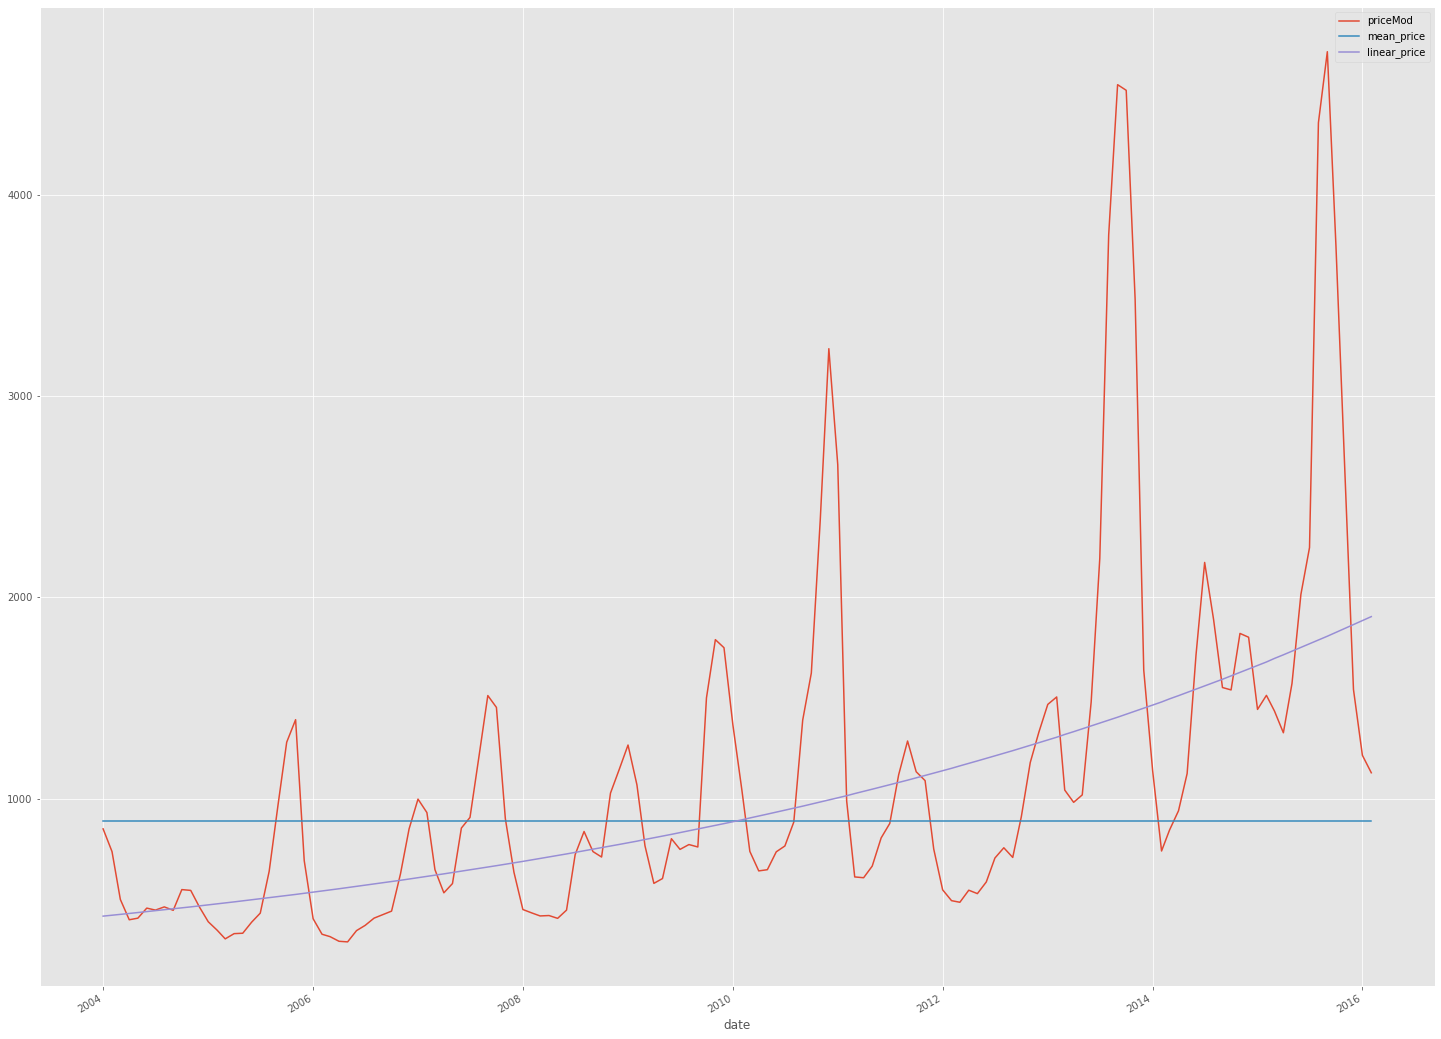

In [137]:
data_mumbai.plot(kind="line", x="date", y=["priceMod", "mean_price","linear_price"])

In [138]:
linear_model_quant = smf.ols('log_priceMod ~ timeindex + np.log(quantity)', data = data_mumbai).fit()
linear_model_quant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     77.15
Date:                Sun, 22 May 2022   Prob (F-statistic):           1.88e-23
Time:                        13:13:06   Log-Likelihood:                -89.461
No. Observations:                 146   AIC:                             184.9
Df Residuals:                     143   BIC:                             193.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.2955      2.508      6.097      0.000      10.337      20.254
timeindex            0.0109      0.001     12.216      0.000       0.009       0.013
np.log(quantity)    -0.7562      0.205     -3.696      0.000      -1.161      -0.352
==============================================================================
Omnibus:                        4.787   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.880
Skew:                           0.429   Prob(JB):                       0.0872
Kurtosis:                       2.742   Cond. No.                     5.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

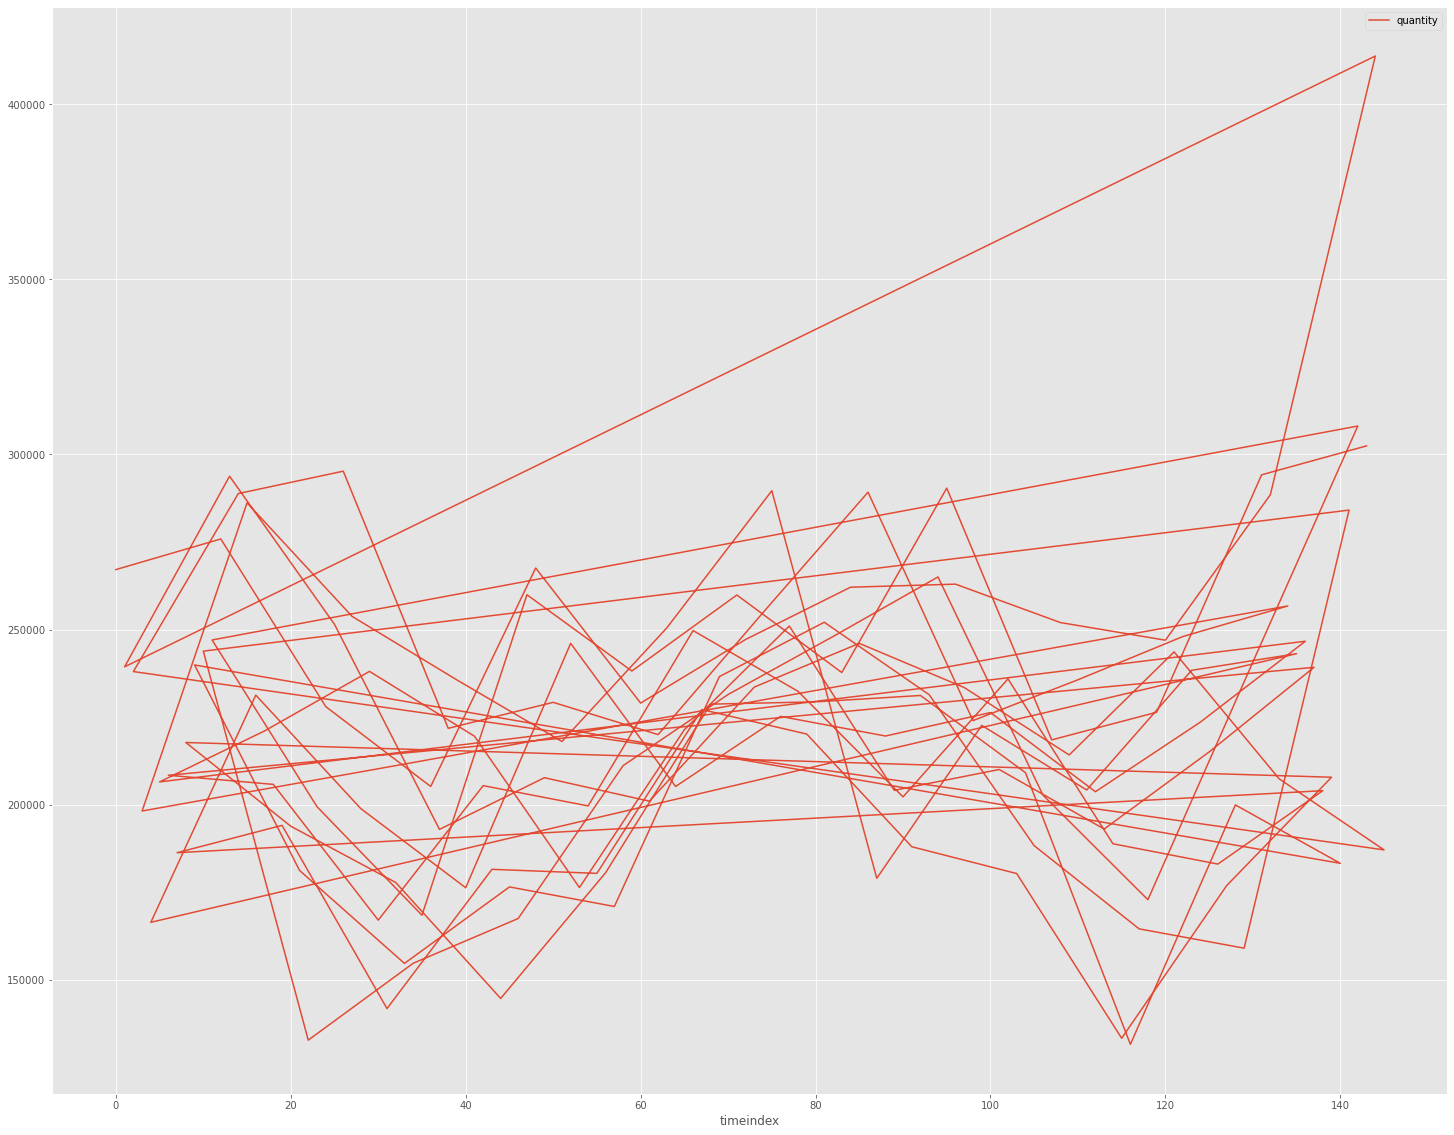

In [139]:
data_mumbai["linear_price_quant"] = np.exp(linear_model_quant.predict())
data_mumbai.plot(kind = "line", x="timeindex", y = "quantity")
plt.show()

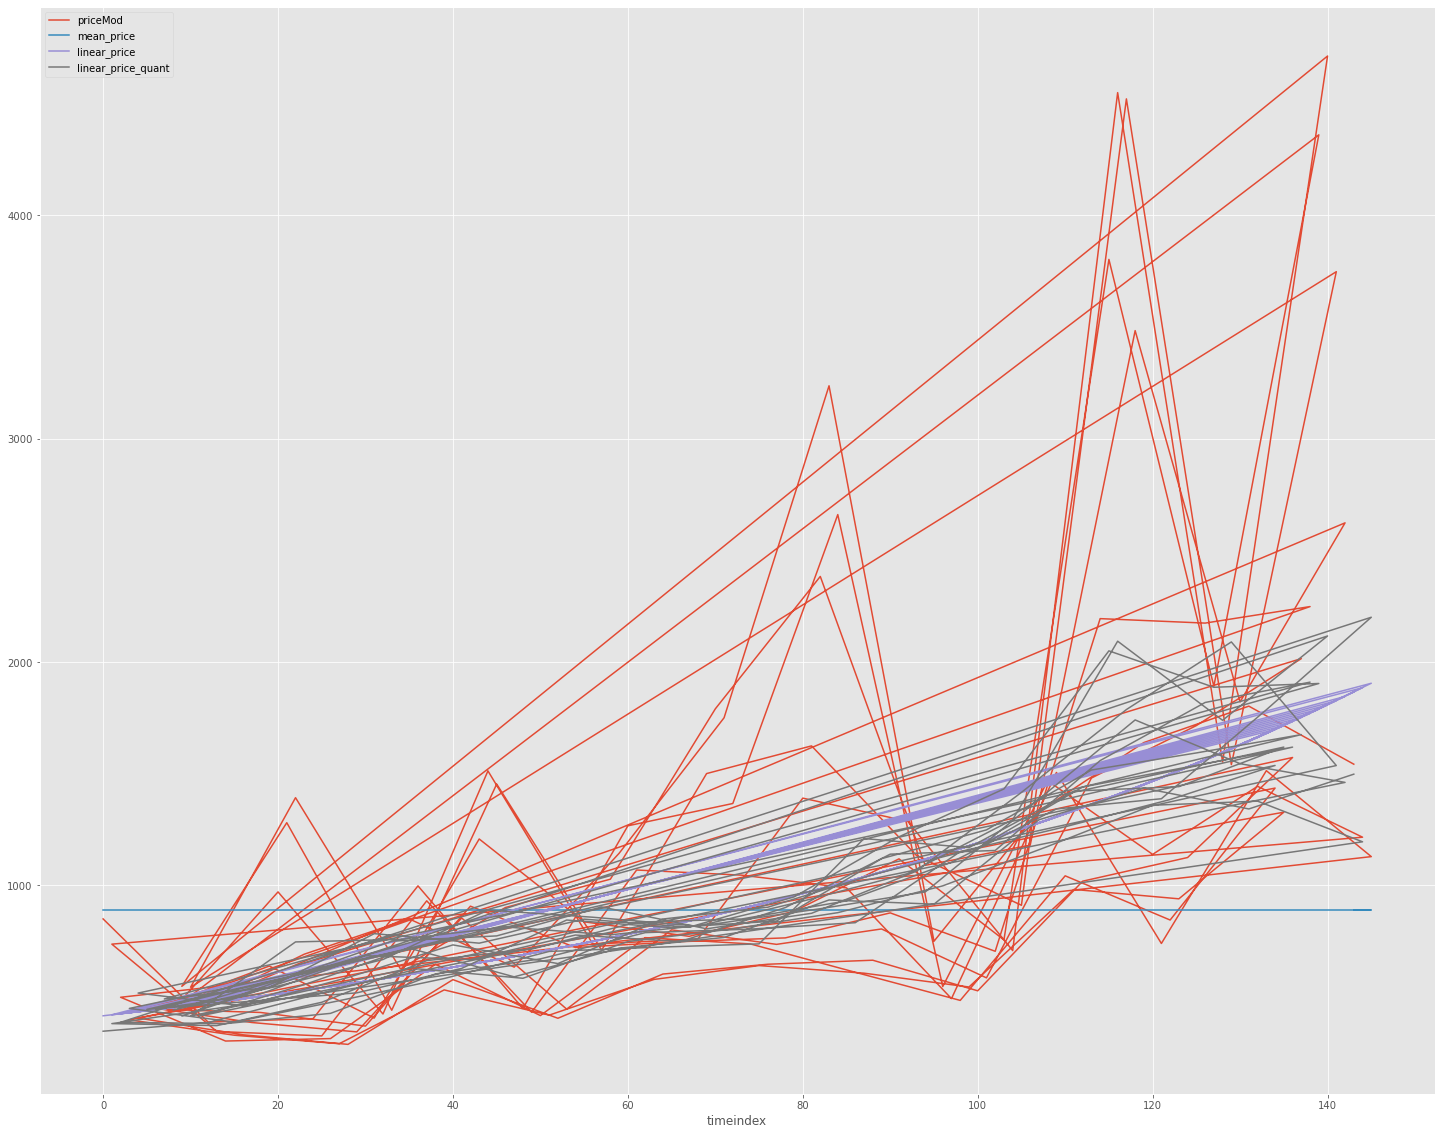

In [140]:
data_mumbai.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", 
                                             "linear_price", "linear_price_quant"])
plt.show()

<AxesSubplot:xlabel='date'>

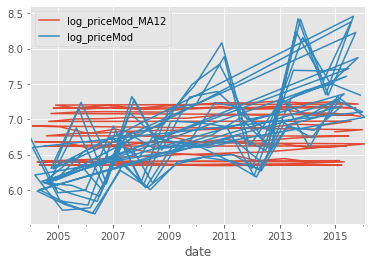

In [146]:
# smoothing the value using 12 month moving average
data_mumbai["log_priceMod_MA12"] = data_mumbai.log_priceMod.rolling(12).mean()
data_mumbai.plot(kind="line", y=["log_priceMod_MA12", "log_priceMod"])

In [148]:
data_mumbai["MA12_price"] = np.exp(data_mumbai.log_priceMod_MA12)
data_mumbai.sample(5)

quantity  priceMod       date  log_priceMod  mean_price  timeindex  \
date                                                                          
2008-12    238150      1143 2008-12-01             7         889         59   
2004-11    243820       543 2004-11-01             6         889         10   
2012-01    262950       546 2012-01-01             6         889         96   
2010-07    232350       764 2010-07-01             7         889         78   
2012-09    209150       707 2012-09-01             7         889        104   

         linear_price  linear_price_quant  log_priceMod_MA12  MA12_price  
date                                                                      
2008-12           772                 718                  7        1271  
2004-11           461                 413                  7        1287  
2012-01          1138                 997                NaN         NaN  
2010-07           942                 900                  7         795  
2012-09          1238                1294                  7        1163

In [149]:
MA_model_forcast = data_mumbai.log_priceMod_MA12.tail(12).mean()

In [150]:
MA12_model_RMSE = RMSE(data_mumbai.priceMod, data_mumbai.MA12_price)
MA12_model_RMSE

841.8072265328709

In [151]:
Result_data.loc[3,"Model"] = "Moving Average 12"
Result_data.loc[3,"Forcast"] = np.exp(MA_model_forcast)
Result_data.loc[3,"RMSE"] = MA12_model_RMSE
Result_data.head()

Model Forcast RMSE
0         Mean Model     889  908
1       Linear Model    1754  725
3  Moving Average 12    1255  842

<AxesSubplot:xlabel='timeindex'>

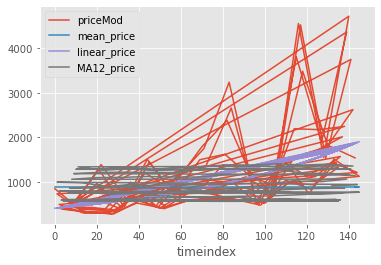

In [153]:
data_mumbai.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", "linear_price",
                                              "MA12_price"])

<h3>ARIMA Model</h3>

In [157]:
ts = data_mumbai.log_priceMod
ts_diff = data_mumbai.log_priceMod
ts_diff.dropna(inplace = True)

In [158]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.31319668,  0.37165336, -0.06140673,  0.16869007,
       -0.02175521,  0.16634997,  0.01127215,  0.10597047, -0.07053858,
        0.27560045,  0.29894124,  0.78300906,  0.35419085,  0.29376392,
       -0.02414901,  0.1003445 ,  0.00663592,  0.1009527 ,  0.02262413,
        0.07107539])

<AxesSubplot:>

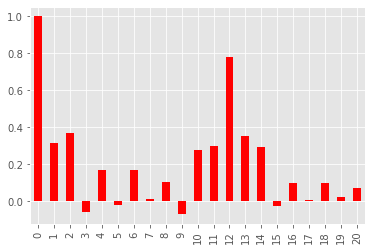

In [159]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")#acf plot

<AxesSubplot:>

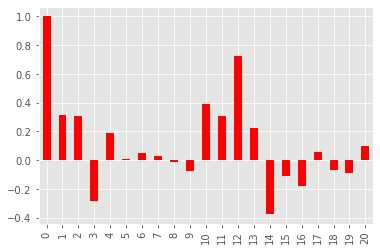

In [160]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")#pacf plot

In [161]:
from statsmodels.tsa.arima_model import ARIMA

In [162]:
ts_diff.head()

date
2004-01    7
2005-01    6
2006-01    6
2007-01    7
2008-01    6
Freq: M, Name: log_priceMod, dtype: float64

In [163]:
ARIMA_model = ARIMA(ts_diff, order=(1,0,1))
ARIMA_result = ARIMA_model.fit(disp = -1)
ARIMA_result.fittedvalues.head()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will 

date
2004-01    7
2005-01    7
2006-01    7
2007-01    6
2008-01    7
Freq: M, dtype: float64

<AxesSubplot:xlabel='date'>

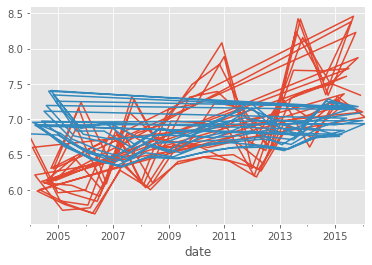

In [164]:
ts_diff.plot()
ARIMA_result.fittedvalues.plot()

In [165]:
ts_diff.sum()

991.3706576498936

In [166]:
predictions_ARIMA_diff = pd.Series(ARIMA_result.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

date
2011-12    7
2012-12    7
2013-12    7
2014-12    7
2015-12    7
Freq: M, dtype: float64

In [167]:
predictions_ARIMA_diff.sum()

991.1122814447585

In [168]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()


date
2011-12    963
2012-12    970
2013-12    977
2014-12    984
2015-12    991
Freq: M, dtype: float64

<h3> model plot summary </h3>

<AxesSubplot:xlabel='timeindex'>

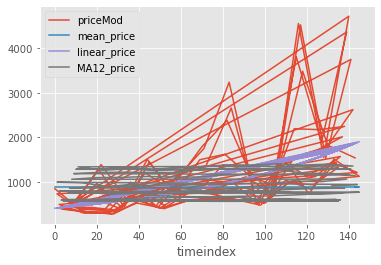

In [173]:
data_mumbai.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", "linear_price", 
                                             "MA12_price"])